In [26]:
# import libraries
import numpy as np
import pandas as pd

from warnings import filterwarnings
filterwarnings("ignore")

from pathlib import Path

In [27]:
# Set relative path to the dataset folder
data_path = Path("01_data")

# Read CSV files from data_path
train = pd.read_csv(data_path/'train.csv')
test = pd.read_csv(data_path/'test.csv')

print(f"- train.csv: {train.shape}")
print(f"- test.csv: {test.shape}")

# Clean column names for all DataFrames: apply lower() and strip()
# Store original columns for reference
original_train_cols = train.columns.tolist()
original_test_cols = test.columns.tolist()

# Clean column names
train.columns = train.columns.str.lower().str.strip()
test.columns = test.columns.str.lower().str.strip()

- train.csv: (8990, 98)
- test.csv: (10, 99)


In [28]:
train.head()

,date_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,v3,v4,v5,v6,v7,v8,v9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [29]:
train.columns

Index(['date_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'e1',
       'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19',
       'e2', 'e20', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'i1', 'i2', 'i3',
       'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'm1', 'm10', 'm11', 'm12', 'm13',
       'm14', 'm15', 'm16', 'm17', 'm18', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7',
       'm8', 'm9', 'p1', 'p10', 'p11', 'p12', 'p13', 'p2', 'p3', 'p4', 'p5',
       'p6', 'p7', 'p8', 'p9', 's1', 's10', 's11', 's12', 's2', 's3', 's4',
       's5', 's6', 's7', 's8', 's9', 'v1', 'v10', 'v11', 'v12', 'v13', 'v2',
       'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [30]:
"""
train.csv Historic market data. 
The coverage stretches back decades; expect to see extensive missing values early on.

date_id - An identifier for a single trading day.
M* - Market Dynamics/Technical features.
E* - Macro Economic features.
I* - Interest Rate features.
P* - Price/Valuation features.
V* - Volatility features.
S* - Sentiment features.
MOM* - Momentum features.
D* - Dummy/Binary features.

forward_returns - The returns from buying the S&P 500 and selling it a day later. Train set only.

risk_free_rate - The federal funds rate. Train set only.

market_forward_excess_returns - Forward returns relative to expectations. 
Computed by subtracting the rolling five-year mean forward returns and winsorizing 
the result using a median absolute deviation (MAD) with a criterion of 4. Train set only.
""";

In [31]:
test.head()

,date_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,v4,v5,v6,v7,v8,v9,is_scored,lagged_forward_returns,lagged_risk_free_rate,lagged_market_forward_excess_returns
0,8980,0,0,0,0,1,0,0,1,0,...,0.828042,0.999172,0.759921,-0.803127,0.170966,-0.751909,True,0.003541,0.000161,0.003068
1,8981,0,0,0,0,1,0,0,1,0,...,0.831349,1.120336,0.556217,-0.686192,0.141865,-0.660326,True,-0.005964,0.000162,-0.006437
2,8982,0,0,0,0,1,0,0,0,1,...,0.832672,1.088992,0.665344,-0.459367,0.199405,-0.510979,True,-0.007410,0.000160,-0.007882
3,8983,0,0,0,0,1,0,0,0,1,...,0.835979,1.040988,0.594577,-0.561643,0.161706,-0.575997,True,0.005420,0.000160,0.004949
4,8984,0,0,0,0,0,0,1,0,1,...,0.839947,0.944593,0.715608,-0.692649,0.124669,-0.654045,True,0.008357,0.000159,0.007887


In [32]:
test.columns

Index(['date_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'e1',
       'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19',
       'e2', 'e20', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'i1', 'i2', 'i3',
       'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'm1', 'm10', 'm11', 'm12', 'm13',
       'm14', 'm15', 'm16', 'm17', 'm18', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7',
       'm8', 'm9', 'p1', 'p10', 'p11', 'p12', 'p13', 'p2', 'p3', 'p4', 'p5',
       'p6', 'p7', 'p8', 'p9', 's1', 's10', 's11', 's12', 's2', 's3', 's4',
       's5', 's6', 's7', 's8', 's9', 'v1', 'v10', 'v11', 'v12', 'v13', 'v2',
       'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'is_scored',
       'lagged_forward_returns', 'lagged_risk_free_rate',
       'lagged_market_forward_excess_returns'],
      dtype='object')

In [33]:
"""
test.csv 
A mock test set representing the structure of the unseen test set. 
The test set used for the public leaderboard set is a copy of the last 180 date IDs in the train set. 
As a result, the public leaderboard scores are not meaningful. 
The unseen copy of this file served by the evaluation API may be updated during the model training phase.

date_id
[feature_name] - The feature columns are the same as in train.csv.
is_scored - Whether this row is included in the evaluation metric calculation. 
During the model training phase this will be true for the first 180 rows only. Test set only.

lagged_forward_returns - The returns from buying the S&P 500 and selling it a day later, provided with a lag of one day.

lagged_risk_free_rate - The federal funds rate, provided with a lag of one day.

lagged_market_forward_excess_returns - Forward returns relative to expectations. 
Computed by subtracting the rolling five-year mean forward returns and winsorizing the result 
using a median absolute deviation (MAD) with a criterion of 4, provided with a lag of one day.

""";

In [34]:
# check columns in common
common_cols = set(original_train_cols).intersection(set(original_test_cols))
print(f"\n📊 COMMON COLUMNS BETWEEN TRAIN AND TEST: {len(common_cols)}")
print(common_cols)

# check columns in train not in test
train_not_in_test = set(original_train_cols) - set(original_test_cols)
print(f"\n📊 COLUMNS IN TRAIN NOT IN TEST: {len(train_not_in_test)}")
print(train_not_in_test)

# check columns in test not in train
test_not_in_train = set(original_test_cols) - set(original_train_cols)
print(f"\n📊 COLUMNS IN TEST NOT IN TRAIN: {len(test_not_in_train)}")
print(test_not_in_train)


📊 COMMON COLUMNS BETWEEN TRAIN AND TEST: 95
{'S1', 'V5', 'P11', 'V2', 'V6', 'P9', 'V1', 'D9', 'P2', 'I9', 'D4', 'E17', 'D3', 'M13', 'P8', 'E16', 'V8', 'S8', 'V10', 'D6', 'E9', 'M7', 'V9', 'D5', 'E8', 'I1', 'E3', 'P12', 'E11', 'M2', 'S3', 'M11', 'S11', 'I4', 'S12', 'E7', 'E5', 'M10', 'E18', 'E20', 'E2', 'M18', 'M3', 'P7', 'M5', 'V4', 'M4', 'E6', 'V12', 'P1', 'P5', 'E4', 'P10', 'M14', 'P6', 'D8', 'I2', 'S6', 'E14', 'M8', 'M6', 'S5', 'M9', 'S10', 'M15', 'E13', 'date_id', 'I8', 'V11', 'E12', 'V3', 'S4', 'S2', 'P13', 'E15', 'D1', 'E10', 'E1', 'P3', 'E19', 'I3', 'I5', 'M16', 'P4', 'M1', 'M12', 'M17', 'I6', 'V7', 'D7', 'S9', 'S7', 'D2', 'V13', 'I7'}

📊 COLUMNS IN TRAIN NOT IN TEST: 3
{'forward_returns', 'market_forward_excess_returns', 'risk_free_rate'}

📊 COLUMNS IN TEST NOT IN TRAIN: 4
{'lagged_forward_returns', 'lagged_risk_free_rate', 'is_scored', 'lagged_market_forward_excess_returns'}


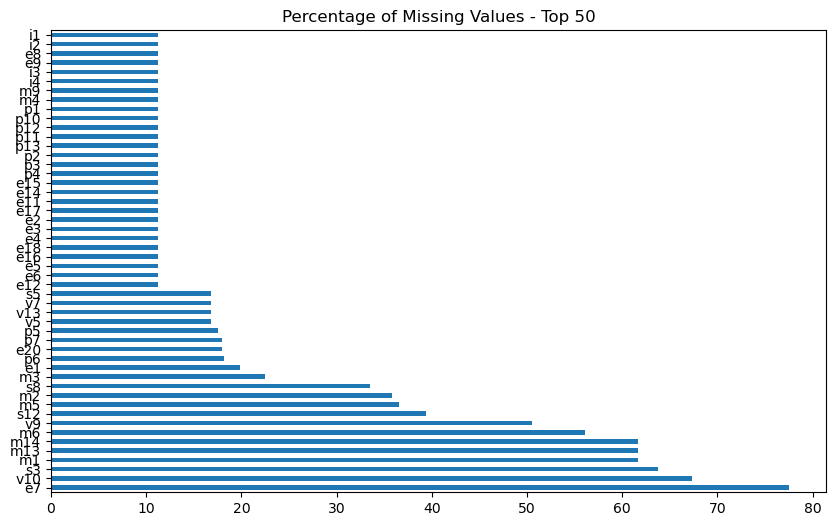

In [35]:
import matplotlib.pyplot as plt

miss_train = 100 * train.isna().mean().sort_values(ascending=False)
# print(miss_train.head(30))
plt.figure(figsize=(10,6))
miss_train[miss_train>0].head(50).plot.barh()
plt.title("Percentage of Missing Values - Top 50")
plt.show()

In [ ]:
# drop columns with more than 51% missing values
cols_to_drop = miss_train[miss_train > 51].index.tolist()
print(f"\n Dropping {len(cols_to_drop)} columns with more than 51% missing values:")
print(cols_to_drop)

# drop cols_to_drop from train dataset
train.drop(columns=cols_to_drop, inplace=True)

# fill missing values based on percentage
cols_fill_mean = miss_train[(miss_train > 21) & (miss_train <= 50)].index.tolist()
cols_fill_zero = miss_train[miss_train <= 21].index.tolist()

# remove dropped columns from fill lists
cols_fill_mean = [col for col in cols_fill_mean if col in train.columns]
cols_fill_zero = [col for col in cols_fill_zero if col in train.columns]

# apply filling
train[cols_fill_mean] = train[cols_fill_mean].fillna(train[cols_fill_mean].mean())
train[cols_fill_zero] = train[cols_fill_zero].fillna(0)

print("\nAfter filling missing values:")
print(f"train.shape: {train.shape}")
print(f"Filled {len(cols_fill_mean)} columns with mean")
print(f"Filled {len(cols_fill_zero)} columns with 0")


 Dropping 7 columns with more than 51% missing values:
['e7', 'v10', 's3', 'm1', 'm13', 'm14', 'm6']
train.shape: (8990, 91)
Filled 5 columns with mean
Filled 85 columns with 0
